In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [3]:
img_path = '/Users/aadipatangi/Desktop/Python Projects/ConeDetection/test/red/frame_1010.jpg'

In [4]:
def imgdisplay(img):
    plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB) )

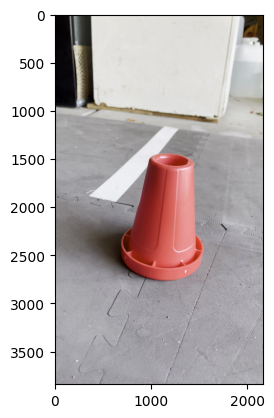

In [5]:
image = cv.imread(img_path)
imgdisplay(image)

In [12]:
#Pre defined labels for the model
LABELS   = ['RED','BLUE']

# pre trained model to use
modelname = 'tf_model1.h5'
    
# load the model
trained_model =  keras.models.load_model(modelname)

In [15]:
def get_image_label(src_path):
    img_arr = cv.imread(src_path)[...,::-1] #convert BGR to RGB format

    # image prep for model input
    IMG_HEIGHT = 480
    IMG_WIDTH  = 270

    resized_img_arr = cv.resize(img_arr, (IMG_HEIGHT, IMG_WIDTH)) # Reshaping images to preferred size
        
    flatten_image = resized_img_arr.reshape(-1, IMG_HEIGHT*IMG_WIDTH*3)
        
    # reshape/flatten input array for model input
    reshape_dim = (-1, 480, 270, 3)
    flatten_image = flatten_image.reshape(reshape_dim)
      
        
    # predict image label index
    pred_dist = trained_model.predict(flatten_image)
    pred_index = np.argmax(pred_dist[0])
        
    # predicted label 
    label = LABELS[pred_index]

    return label



In [23]:
test_img_dir = '/Users/aadipatangi/Desktop/Python Projects/ConeDetection/test/red'

test_img = test_img_dir+'/'+'frame_1000.jpg'


print(get_image_label(test_img))

1/1 [==============================] - 0s 10ms/step
RED


In [26]:

vid = cv.VideoCapture(0)


while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
    if not ret:
            break
    frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    label = get_image_label(frame)

    print(label)
    
    
   

    #print(tags[0].tag_family)
    # Display the resulting frame
    cv.imshow('frame', frame)
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv.destroyAllWindows()

OpenCV: AVFoundation didn't find any attached Video Input Devices!
OpenCV: camera failed to properly initialize!
